In [1]:
# Importing packages 

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading files

aisle_data = pd.read_csv('Instacart_2017_05_01/aisles.csv', sep = ',')
dept_data = pd.read_csv('Instacart_2017_05_01/departments.csv', sep = ',')
orders_data = pd.read_csv('Instacart_2017_05_01/orders.csv', sep = ',')
prod_data = pd.read_csv('Instacart_2017_05_01/products.csv', sep = ',')
order_prod_data = pd.read_csv('Instacart_2017_05_01/order_products__train.csv', sep = ',')


### Peak hour of the day

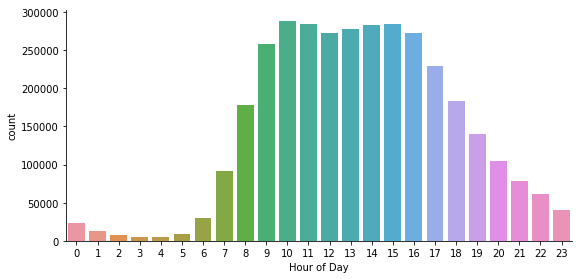

In [3]:
# What is the peak hour od the day for orders from instacart customers?

fig1 = sns.factorplot('order_hour_of_day', data=orders_data, kind='count', aspect=2)
fig1.set_xlabels('Hour of Day')

### Instacart customers: weekend shoppers or weekday shoppers? 

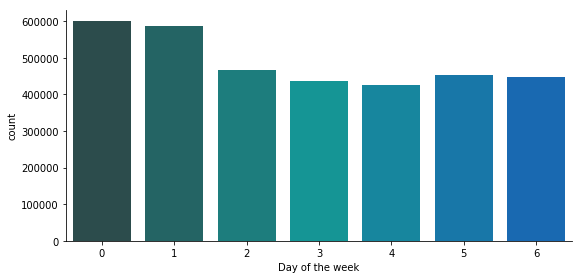

In [4]:
# Do instacart customers prefer weekend shopping over weekday shopping? 

fig2 = sns.factorplot('order_dow', data=orders_data, kind='count', aspect=2, palette='winter_d')
fig2.set_xlabels('Day of the week')

### Prime time for instacart orders in a week

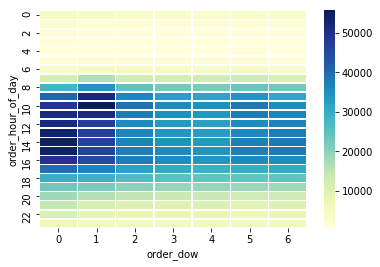

In [5]:
# Heat map that shows prime hours for instacart orders during a week

fig3 = orders_data.pivot_table(index = 'order_hour_of_day', columns = 'order_dow', values = 'order_id', aggfunc = 'count')
sns.heatmap(fig3, fmt = '',cmap = 'YlGnBu', linewidths = 0.5, xticklabels = True, yticklabels = 2)

In [6]:
# Merging product and order table to get products in each order 
prod_in_each_order= pd.merge(prod_data, order_prod_data, on = 'product_id')

# Merging the above dataframe with order data to get complete info on each order
order_details = pd.merge(orders_data, prod_in_each_order, on = 'order_id')

order_details.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,aisle_id,department_id,add_to_cart_order,reordered
0,1187899,1,train,11,4,8,14.0,196,Soda,77,7,1,1
1,1187899,1,train,11,4,8,14.0,10258,Pistachios,117,19,6,1
2,1187899,1,train,11,4,8,14.0,13032,Cinnamon Toast Crunch,121,14,7,1
3,1187899,1,train,11,4,8,14.0,25133,Organic String Cheese,21,16,2,1
4,1187899,1,train,11,4,8,14.0,26088,Aged White Cheddar Popcorn,23,19,8,1


### Most frequently bought items

In [7]:
# Frequently bought items

order_details['product_name'].value_counts().head(10)

Banana                    18726
Bag of Organic Bananas    15480
Organic Strawberries      10894
Organic Baby Spinach       9784
Large Lemon                8135
Organic Avocado            7409
Organic Hass Avocado       7293
Strawberries               6494
Limes                      6033
Organic Raspberries        5546
Name: product_name, dtype: int64

### Most frequently re-ordered items

In [8]:
# Top 10 most frequently re-ordered items

order_details[order_details['reordered']==1]['product_name'].value_counts().head(10)

Banana                    16557
Bag of Organic Bananas    13362
Organic Strawberries       8603
Organic Baby Spinach       8055
Organic Avocado            6226
Organic Hass Avocado       6042
Large Lemon                5923
Strawberries               4786
Organic Raspberries        4279
Limes                      4234
Name: product_name, dtype: int64

In [9]:
# Top 10 items added to the cart first

order_details[order_details['add_to_cart_order']==1]['product_name'].value_counts().head(10)


Banana                        4605
Bag of Organic Bananas        3889
Organic Whole Milk            1144
Organic Avocado                995
Organic Strawberries           900
Organic Baby Spinach           869
Organic Hass Avocado           797
Spring Water                   730
Strawberries                   707
Sparkling Water Grapefruit     647
Name: product_name, dtype: int64